In [1]:
#The garbage collector, attempts to reclaim memory occupied by objects

In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc                         
gc.enable()

In [3]:
order_products_train = pd.read_csv(r"C:\Users\Don\Downloads\instacart-market-basket-analysis\order_products__train.csv\order_products__train.csv")
order_products_prior = pd.read_csv(r"C:\Users\Don\Downloads\instacart-market-basket-analysis\order_products__prior.csv\order_products__prior.csv")
orders = pd.read_csv(r"C:\Users\Don\Downloads\instacart-market-basket-analysis\orders.csv\orders.csv")
products = pd.read_csv(r"C:\Users\Don\Downloads\instacart-market-basket-analysis\products.csv\products.csv")
aisles = pd.read_csv(r"C:\Users\Don\Downloads\instacart-market-basket-analysis\aisles.csv\aisles.csv")
departments = pd.read_csv(r"C:\Users\Don\Downloads\instacart-market-basket-analysis\departments.csv\departments.csv")

In [4]:
#Computer memory kept causing laptop to crash, so used only 20% of orders, can experiment with higher number later
orders = orders.loc[orders.user_id.isin(orders.user_id.drop_duplicates().sample(frac=0.2, random_state=42))] 

In [5]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
45,2717275,5,prior,1,3,12,NaN
46,1909121,5,prior,2,0,16,11.0
47,2267326,5,prior,3,3,18,10.0
48,157374,5,prior,4,1,18,19.0
49,2196797,5,train,5,0,11,6.0


In [6]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
#For plotting Merge and concatenate the datasets

master_df = pd.concat([order_products_prior, order_products_train]).sort_values(by=['order_id'])

master_df = pd.merge(left = master_df, right = products,
                             left_on='product_id', right_on='product_id').sort_values(by=['order_id']).reset_index(drop=True)
master_df = pd.merge(left = master_df, right = aisles,
                             left_on='aisle_id', right_on='aisle_id').sort_values(by=['order_id']).reset_index(drop=True)
master_df = pd.merge(left = master_df, right = departments,
                             left_on='department_id', right_on='department_id').sort_values(by=['order_id']).reset_index(drop=True)
master_df = pd.merge(left = master_df, right = orders,
                             left_on='order_id', right_on='order_id').sort_values(by=['order_id']).reset_index(drop=True)


In [8]:
#Checking info of new master dataset

In [9]:
col_order = ['user_id','order_id','product_id','aisle_id','department_id','add_to_cart_order',
 'reordered','product_name','aisle','department','eval_set','order_number','order_dow','order_hour_of_day',
 'days_since_prior_order']

master_df = master_df[col_order]

master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6827229 entries, 0 to 6827228
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   order_id                int64  
 2   product_id              int64  
 3   aisle_id                int64  
 4   department_id           int64  
 5   add_to_cart_order       int64  
 6   reordered               int64  
 7   product_name            object 
 8   aisle                   object 
 9   department              object 
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 781.3+ MB


In [10]:
len(master_df.groupby(['user_id','order_id','product_id'], as_index=False).count())

6827229

In [11]:
#CHecking how many unique values in each dataset

In [12]:
print ("\nNumber of Rows : ", len(master_df))
print ("Unique user_id: ", master_df['user_id'].nunique(),", % :", f"{master_df['user_id'].nunique() / len(master_df): .2%}")
print ("Unique order_id: ", master_df['order_id'].nunique(),", % :", f"{master_df['order_id'].nunique() / len(master_df): .2%}")
print ("Unique product_id: ", master_df['product_id'].nunique(),", % :", f"{master_df['product_id'].nunique() / len(master_df): .2%}")
print ("Unique aisle_id: ", master_df['aisle_id'].nunique(),", % :", f"{master_df['aisle_id'].nunique() / len(master_df): .2%}")
print ("Unique department_id: ", master_df['department_id'].nunique(),", % :", f"{master_df['department_id'].nunique() / len(master_df): .2%}")
print ("Unique add_to_cart_order: ", master_df['add_to_cart_order'].nunique(),", % :", f"{master_df['add_to_cart_order'].nunique() / len(master_df): .2%}")
print ("Unique reordered: ", master_df['reordered'].nunique(),", % :", f"{master_df['reordered'].nunique() / len(master_df): .2%}")
print ("Unique product_name: ", master_df['product_name'].nunique(),", % :", f"{master_df['product_name'].nunique() / len(master_df): .2%}")
print ("Unique aisle: ", master_df['aisle'].nunique(),", % :", f"{master_df['aisle'].nunique() / len(master_df): .2%}")
print ("Unique department: ", master_df['department'].nunique(),", % :", f"{master_df['department'].nunique() / len(master_df): .2%}")
print ("Unique eval_set: ", master_df['eval_set'].nunique(),", % :", f"{master_df['eval_set'].nunique() / len(master_df): .2%}")
print ("Unique order_number: ", master_df['order_number'].nunique(),", % :", f"{master_df['order_number'].nunique() / len(master_df): .2%}")
print ("Unique order_dow: ", master_df['order_dow'].nunique(),", % :", f"{master_df['order_dow'].nunique() / len(master_df): .2%}")
print ("Unique order_hour_of_day: ", master_df['order_hour_of_day'].nunique(),", % :", f"{master_df['order_hour_of_day'].nunique() / len(master_df): .2%}")
print ("Unique days_since_prior_order: ", master_df['days_since_prior_order'].nunique(),", % :", f"{master_df['days_since_prior_order'].nunique() / len(master_df): .2%}")


Number of Rows :  6827229
Unique user_id:  41242 , % :  0.60%
Unique order_id:  672881 , % :  9.86%
Unique product_id:  46180 , % :  0.68%
Unique aisle_id:  134 , % :  0.00%
Unique department_id:  21 , % :  0.00%
Unique add_to_cart_order:  100 , % :  0.00%
Unique reordered:  2 , % :  0.00%
Unique product_name:  46180 , % :  0.68%
Unique aisle:  134 , % :  0.00%
Unique department:  21 , % :  0.00%
Unique eval_set:  2 , % :  0.00%
Unique order_number:  100 , % :  0.00%
Unique order_dow:  7 , % :  0.00%
Unique order_hour_of_day:  24 , % :  0.00%
Unique days_since_prior_order:  31 , % :  0.00%


In [13]:
master_df.groupby(['department','aisle','product_name'], as_index = False).size()

,department,aisle,product_name,size
0,alcohol,beers coolers,12 Oz Beer,34
1,alcohol,beers coolers,12 Oz Lager,145
2,alcohol,beers coolers,1500 Pale Ale,24
3,alcohol,beers coolers,1664,7
4,alcohol,beers coolers,312 Urban Wheat,19
...,...,...,...,...
46175,snacks,trail mix snack mix,Traditional Snack Mix,430
46176,snacks,trail mix snack mix,Trail Mix,2485
46177,snacks,trail mix snack mix,Tram Bar Peanut Butter Milk Chocolate Trail Mix,2
46178,snacks,trail mix snack mix,Tropical Trail Mix,37


In [14]:
def CreateCharts (ax, data, x, y, chart_type, legend = False, size = 5, hue = None, palette=None):
    if chart_type == "scatter":
        plot = sns.scatterplot(data=data, x=x, y=y, size=size, legend=legend, 
          hue=hue, sizes=(20, 200), palette = palette, ax=ax)
    elif chart_type == "bar":
        plot = sns.barplot(x=x, y=y, data=data, 
          hue=hue, palette = palette, ax=ax, ci="sd")
    elif chart_type == "density":
        plot = sns.kdeplot(x=x, data=data, 
          shade=True, alpha=0.5, ax=ax)  
    elif chart_type == "swarm":
        plot = sns.swarmplot(x=x, y=y, hue=hue, data=data,
                palette=palette, ax=ax)
    elif chart_type =='hist':
        plot = sns.histplot(data=data, x=x, kde=True, ax = ax, palette = palette )
    return plot

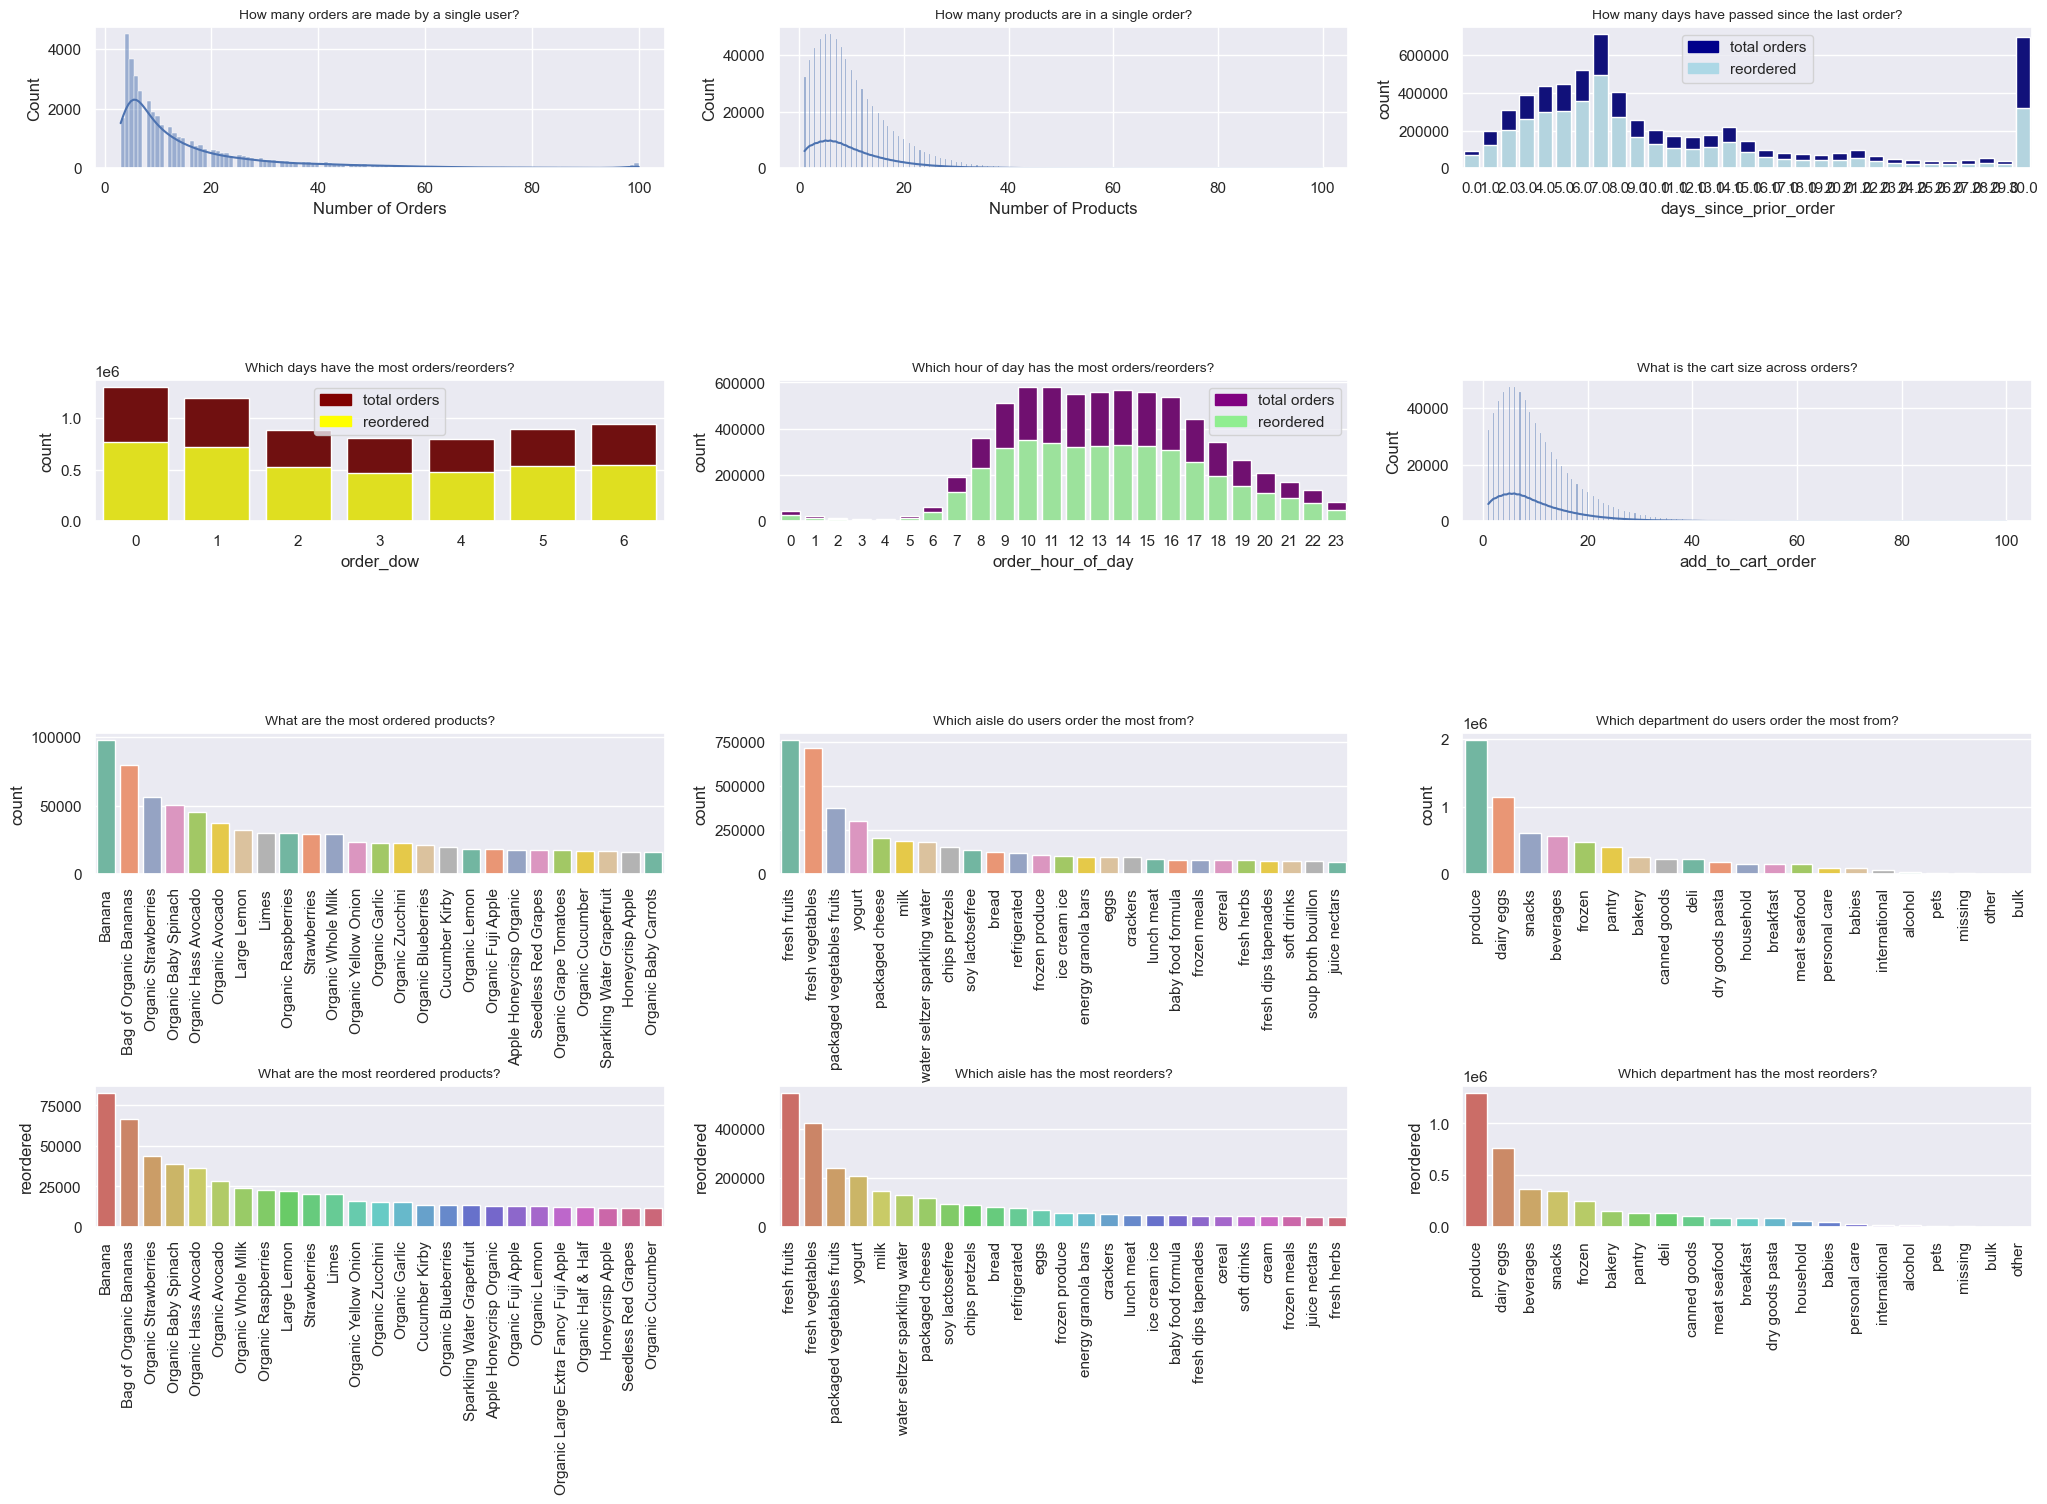

In [15]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(4,3, figsize=(25,15))

# Plot 1
data = master_df[['user_id','order_id']].drop_duplicates().groupby('user_id').size().reset_index(name='Number of Orders').sort_values(by='Number of Orders', ascending=False)
ax[0,0] = CreateCharts(ax[0,0], data, x = "Number of Orders", y=None, chart_type = "hist", palette="bright")
ax[0,0].set_title('How many orders are made by a single user?', fontsize=10)

# Plot 2
data = master_df.groupby('order_id').size().reset_index(name='Number of Products').sort_values(by='Number of Products', ascending=False)
ax[0,1] = CreateCharts(ax[0,1], data, x = "Number of Products", y=None, chart_type = "hist", palette="dark")
ax[0,1].set_title('How many products are in a single order?', fontsize=10)

# Plot 3
import matplotlib.patches as mpatches
data1 = master_df.groupby('days_since_prior_order', as_index=False).size()
bar1 = sns.barplot(x="days_since_prior_order",  y="size", data=data1, color='darkblue', ax=ax[0,2])
data2 = master_df[master_df['reordered']==1].groupby('days_since_prior_order', as_index=False).size()
bar2 = sns.barplot(x="days_since_prior_order",  y="size", data=data2,  color='lightblue', ax=ax[0,2])
top_bar = mpatches.Patch(color='darkblue', label='total orders')
bottom_bar = mpatches.Patch(color='lightblue', label='reordered')
ax[0,2].legend(handles=[top_bar, bottom_bar])
ax[0,2].set_title('How many days have passed since the last order?', fontsize=10)
ax[0,2].set_ylabel('count')
                       
# Plot 4
data1 = master_df.groupby('order_dow', as_index=False).size()
bar1 = sns.barplot(x="order_dow",  y="size", data=data1, color='maroon', ax=ax[1,0])
data2 = master_df[master_df['reordered']==1].groupby('order_dow', as_index=False).size()
bar2 = sns.barplot(x="order_dow",  y="size", data=data2,  color='yellow', ax=ax[1,0])
top_bar = mpatches.Patch(color='maroon', label='total orders')
bottom_bar = mpatches.Patch(color='yellow', label='reordered')
ax[1,0].legend(handles=[top_bar, bottom_bar])
ax[1,0].set_title('Which days have the most orders/reorders?', fontsize=10)
ax[1,0].set_ylabel('count')

# Plot 5
data1 = master_df.groupby('order_hour_of_day', as_index=False).size()
bar1 = sns.barplot(x="order_hour_of_day",  y="size", data=data1, color='purple', ax=ax[1,1])
data2 = master_df[master_df['reordered']==1].groupby('order_hour_of_day', as_index=False).size()
bar2 = sns.barplot(x="order_hour_of_day",  y="size", data=data2,  color='lightgreen', ax=ax[1,1])
top_bar = mpatches.Patch(color='purple', label='total orders')
bottom_bar = mpatches.Patch(color='lightgreen', label='reordered')
ax[1,1].legend(handles=[top_bar, bottom_bar])
ax[1,1].set_title('Which hour of day has the most orders/reorders?', fontsize=10)
ax[1,1].set_ylabel('count')
                       
# Plot 6
data = master_df.groupby('order_id', as_index = False)['add_to_cart_order'].max()
ax[1,2] = CreateCharts(ax[1,2], data, x = "add_to_cart_order", y=None, chart_type = "hist", palette="bright")
ax[1,2].set_title('What is the cart size across orders?', fontsize=10)


# Plot 7
data = master_df.groupby('product_name', as_index = False)['product_id'].count().sort_values(by='product_id', ascending=False)
ax[2,0] = CreateCharts(ax[2,0], data.head(25), "product_name", "product_id", "bar", palette = "Set2")
ax[2,0].set_xticklabels(data.head(25)['product_name'], rotation = 90)
ax[2,0].set_title('What are the most ordered products?', fontsize=10)
ax[2,0].set_xlabel('')
ax[2,0].set_ylabel('count')
                       
# Plot 8
data = master_df.groupby('aisle', as_index = False)['aisle_id'].count().sort_values(by='aisle_id', ascending=False)
ax[2,1] = CreateCharts(ax[2,1], data.head(25), "aisle", "aisle_id", "bar", palette = "Set2")
ax[2,1].set_xticklabels(data.head(25)['aisle'], rotation = 90)
ax[2,1].set_title('Which aisle do users order the most from?', fontsize=10)
ax[2,1].set_xlabel('')
ax[2,1].set_ylabel('count')

# Plot 9
data = master_df.groupby('department', as_index = False)['department_id'].count().sort_values(by='department_id', ascending=False)
ax[2,2] = CreateCharts(ax[2,2], data.head(25), "department", "department_id", "bar", palette = "Set2")
ax[2,2].set_xticklabels(data.head(25)['department'], rotation = 90)
ax[2,2].set_title('Which department do users order the most from?', fontsize=10)
ax[2,2].set_xlabel('')
ax[2,2].set_ylabel('count')
                       
# Plot 10
data = master_df.groupby('product_name', as_index = False)['reordered'].sum().sort_values(by = 'reordered', ascending=False)
ax[3,0] = CreateCharts(ax[3,0], data.head(25),'product_name' , "reordered", "bar", palette = "hls")
ax[3,0].set_xticklabels(data.head(25)['product_name'], rotation = 90)
ax[3,0].set_title('What are the most reordered products?', fontsize=10)
ax[3,0].set_xlabel('')

# Plot 11
data = master_df.groupby('aisle', as_index = False)['reordered'].sum().sort_values(by = 'reordered', ascending=False)
ax[3,1] = CreateCharts(ax[3,1], data.head(25),'aisle' , "reordered", "bar", palette = "hls")
ax[3,1].set_xticklabels(data.head(25)['aisle'], rotation = 90)
ax[3,1].set_title('Which aisle has the most reorders?', fontsize=10)
ax[3,1].set_xlabel('')
                       
                       # Plot 12
data = master_df.groupby('department', as_index = False)['reordered'].sum().sort_values(by = 'reordered', ascending=False)
ax[3,2] = CreateCharts(ax[3,2], data.head(25),'department' , "reordered", "bar", palette = "hls")
ax[3,2].set_xticklabels(data.head(25)['department'], rotation = 90)
ax[3,2].set_title('Which department has the most reorders?', fontsize=10)
ax[3,2].set_xlabel('')


plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=1.5)

plt.show()

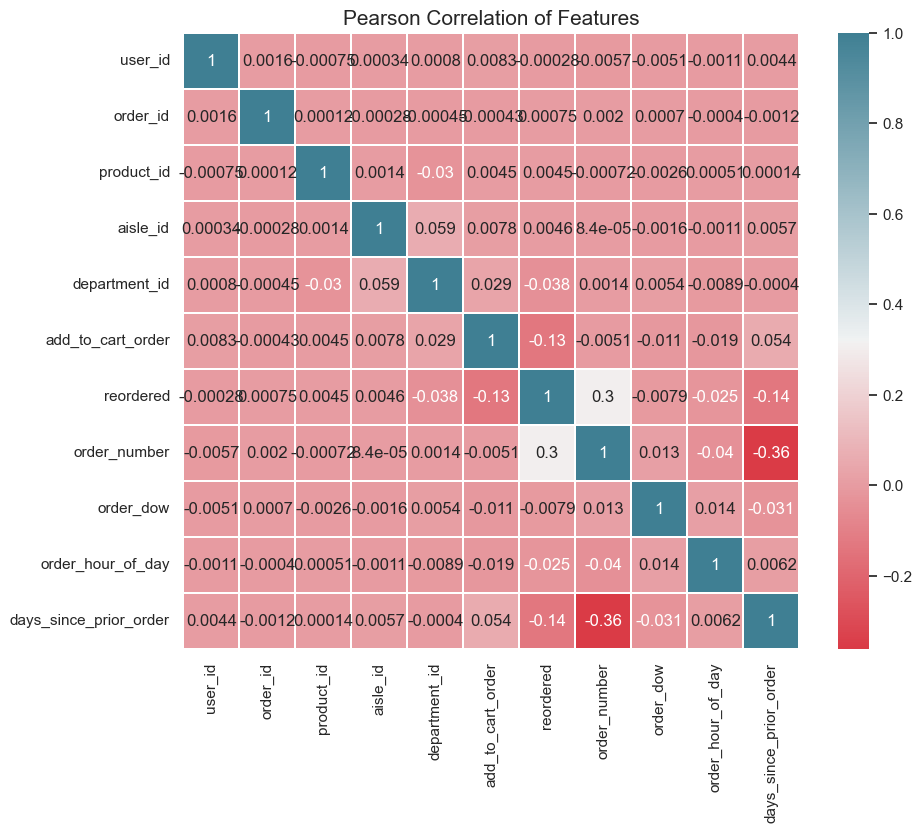

In [16]:
plt.figure(figsize=(10,8))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(master_df.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()

In [17]:
# Converting character variables into category so they can be used to create the model.
aisles['aisle'] = aisles['aisle'].astype('category')
departments['department'] = departments['department'].astype('category')
orders['eval_set'] = orders['eval_set'].astype('category')
products['product_name'] = products['product_name'].astype('category')

In [18]:
#Create a DataFrame with the orders and the products that have been purchased on prior orders in a variable (op)

In [19]:
op = orders.merge(order_products_prior, on='order_id', how='inner')

In [20]:
op.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2717275,5,prior,1,3,12,NaN,15349,1,0
1,2717275,5,prior,1,3,12,NaN,21413,2,0
2,2717275,5,prior,1,3,12,NaN,48775,3,0
3,2717275,5,prior,1,3,12,NaN,28289,4,0
4,2717275,5,prior,1,3,12,NaN,8518,5,0
5,2717275,5,prior,1,3,12,NaN,11777,6,0
6,2717275,5,prior,1,3,12,NaN,31717,7,0
7,2717275,5,prior,1,3,12,NaN,26604,8,0
8,2717275,5,prior,1,3,12,NaN,43693,9,0
9,2717275,5,prior,1,3,12,NaN,22475,10,0


In [21]:
#We need to make predictors.
#find average days since prior order (user)
#find the number of orders per customer, first create Dataframe (user1).

In [22]:
user= orders.groupby('user_id')[['days_since_prior_order']].mean()
user.columns=['avg_days_since_prior_order']
user.head()


,avg_days_since_prior_order
user_id,
5,11.500000
7,10.450000
13,7.666667
23,18.500000
32,22.200000


In [23]:
user1 = op.groupby('user_id')['order_number'].max().to_frame('u_total_orders')
user1.head()


,u_total_orders
user_id,
5,4
7,20
13,12
23,4
32,5


In [24]:
user1 = user1.reset_index()
user1.head()

,user_id,u_total_orders
0,5,4
1,7,20
2,13,12
3,23,4
4,32,5


In [25]:
#How frequently a client has reordered products

In [26]:
u_reorder = op.groupby('user_id')['reordered'].mean().to_frame('u_reordered_ratio')
u_reorder = u_reorder.reset_index()
u_reorder.head()

,user_id,u_reordered_ratio
0,5,0.378378
1,7,0.669903
2,13,0.641975
3,23,0.100000
4,32,0.298246


In [27]:
prd = pd.merge(orders, order_products_prior, on='order_id', how='inner')
prd.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2717275,5,prior,1,3,12,NaN,15349,1,0
1,2717275,5,prior,1,3,12,NaN,21413,2,0
2,2717275,5,prior,1,3,12,NaN,48775,3,0
3,2717275,5,prior,1,3,12,NaN,28289,4,0
4,2717275,5,prior,1,3,12,NaN,8518,5,0
5,2717275,5,prior,1,3,12,NaN,11777,6,0
6,2717275,5,prior,1,3,12,NaN,31717,7,0
7,2717275,5,prior,1,3,12,NaN,26604,8,0
8,2717275,5,prior,1,3,12,NaN,43693,9,0
9,2717275,5,prior,1,3,12,NaN,22475,10,0


In [28]:
#For each customer, getting the size of each order they have made.
order_size= prd.groupby(['user_id', 'order_id'])['product_id'].count()
order_size = order_size.to_frame()
order_size.columns=['size']
order_size.head()

size
user_id order_id      
5       157374      12
        1909121      9
        2267326      5
        2717275     11
7       23391       11

In [29]:
#Getting the average order size for each user.
results= order_size.groupby('user_id').mean()
results.columns= ['order_size_avg']
results.head(10)

,order_size_avg
user_id,
5,9.250000
7,10.300000
13,6.750000
23,10.000000
32,22.800000
34,6.400000
35,20.444444
36,4.135135
45,4.500000


In [30]:
user = user.merge(u_reorder, on='user_id', how='inner')

del u_reorder
gc.collect()

user.head()

,user_id,avg_days_since_prior_order,u_reordered_ratio
0,5,11.500000,0.378378
1,7,10.450000,0.669903
2,13,7.666667,0.641975
3,23,18.500000,0.100000
4,32,22.200000,0.298246


In [31]:
user = user.merge(user1, on='user_id', how='inner')

del user1
gc.collect()

user.head()

,user_id,avg_days_since_prior_order,u_reordered_ratio,u_total_orders
0,5,11.500000,0.378378,4
1,7,10.450000,0.669903,20
2,13,7.666667,0.641975,12
3,23,18.500000,0.100000,4
4,32,22.200000,0.298246,5


In [32]:
user = user.merge(results, on='user_id', how='inner')

del results
gc.collect()

user.head()

,user_id,avg_days_since_prior_order,u_reordered_ratio,u_total_orders,order_size_avg
0,5,11.500000,0.378378,4,9.25
1,7,10.450000,0.669903,20,10.30
2,13,7.666667,0.641975,12,6.75
3,23,18.500000,0.100000,4,10.00
4,32,22.200000,0.298246,5,22.80


In [33]:
#Find the total number of purchases from all users for each product.

In [34]:
prd = op.groupby('product_id')['order_id'].count().to_frame('p_total_purchases')
prd.head()

,p_total_purchases
product_id,
1,300
2,13
3,80
4,66
5,4


In [35]:
prd = prd.reset_index()
prd.head()

,product_id,p_total_purchases
0,1,300
1,2,13
2,3,80
3,4,66
4,5,4


In [36]:
#Probability for a product to be reorderd
#First remove products with less than 50 purchases

In [37]:
p_reorder = op.groupby('product_id').filter(lambda x: x.shape[0] >50)
p_reorder.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2717275,5,prior,1,3,12,NaN,15349,1,0
1,2717275,5,prior,1,3,12,NaN,21413,2,0
2,2717275,5,prior,1,3,12,NaN,48775,3,0
3,2717275,5,prior,1,3,12,NaN,28289,4,0
4,2717275,5,prior,1,3,12,NaN,8518,5,0


In [38]:
#Group products together and find the mean
#the mean() calculates how many times a product has been reordered, divided by how many times has been ordered in total.

In [39]:
p_reorder = p_reorder.groupby('product_id')['reordered'].mean().to_frame('p_reorder_ratio')
p_reorder = p_reorder.reset_index()
p_reorder.head()

,product_id,p_reorder_ratio
0,1,0.596667
1,3,0.837500
2,4,0.424242
3,10,0.562069
4,23,0.393204


In [40]:
#at which point the product was added to cart

In [41]:
avg_pos = op.groupby('product_id')[['add_to_cart_order']].mean()
avg_pos.columns=['mean_add_to_cart_order']
avg_pos.head()

,mean_add_to_cart_order
product_id,
1,5.303333
2,11.307692
3,4.537500
4,11.166667
5,9.750000


In [42]:
#Merge the prd dataset with reorder dataset
prd = prd.merge(p_reorder, on='product_id', how='left')

#delete the reorder DataFrame
del p_reorder
gc.collect()

prd.head()

,product_id,p_total_purchases,p_reorder_ratio
0,1,300,0.596667
1,2,13,NaN
2,3,80,0.837500
3,4,66,0.424242
4,5,4,NaN


In [43]:
#Remove the NAN values

In [44]:
prd['p_reorder_ratio'] = prd['p_reorder_ratio'].fillna(value=0)
prd.head()

,product_id,p_total_purchases,p_reorder_ratio
0,1,300,0.596667
1,2,13,0.000000
2,3,80,0.837500
3,4,66,0.424242
4,5,4,0.000000


In [45]:
prd = prd.merge(avg_pos, on='product_id', how='left')

#delete the reorder DataFrame
del avg_pos
gc.collect()

prd.head()

,product_id,p_total_purchases,p_reorder_ratio,mean_add_to_cart_order
0,1,300,0.596667,5.303333
1,2,13,0.000000,11.307692
2,3,80,0.837500,4.537500
3,4,66,0.424242,11.166667
4,5,4,0.000000,9.750000


In [46]:
#How many times a user bought a product

In [47]:
uxp = op.groupby(['user_id', 'product_id'])['order_id'].count().to_frame('uxp_total_bought')
uxp.head()

uxp_total_bought
user_id product_id                  
5       3376                       1
        5999                       1
        6808                       1
        8518                       2
        11777                      4

In [48]:
uxp = uxp.reset_index()
uxp.head()

,user_id,product_id,uxp_total_bought
0,5,3376,1
1,5,5999,1
2,5,6808,1
3,5,8518,2
4,5,11777,4


In [49]:
#How frequently a client bought a product after its first time ?

In [50]:
times = op.groupby(['user_id', 'product_id'])[['order_id']].count()
times.columns = ['Times_Bought_N']
times.head()

Times_Bought_N
user_id product_id                
5       3376                     1
        5999                     1
        6808                     1
        8518                     2
        11777                    4

In [51]:
total_orders = op.groupby('user_id')['order_number'].max().to_frame('total_orders')
total_orders.head()

,total_orders
user_id,
5,4
7,20
13,12
23,4
32,5


In [52]:
#First time a user bought a product

In [53]:
first_order_no = op.groupby(['user_id', 'product_id'])['order_number'].min().to_frame('first_order_number')
first_order_no  = first_order_no.reset_index()
first_order_no.head()

,user_id,product_id,first_order_number
0,5,3376,4
1,5,5999,4
2,5,6808,2
3,5,8518,1
4,5,11777,1


In [54]:
span = pd.merge(total_orders, first_order_no, on='user_id', how='right')
span.head(20)

,user_id,total_orders,product_id,first_order_number
0,5,4,3376,4
1,5,4,5999,4
2,5,4,6808,2
3,5,4,8518,1
4,5,4,11777,1
5,5,4,13870,2
6,5,4,13988,2
7,5,4,15349,1
8,5,4,16168,4
9,5,4,18761,2


In [55]:
#For each product get the total orders placed since its first order ('Order_Range_D')

In [56]:
span['Order_Range_D'] = span.total_orders - span.first_order_number + 1
span.head(30)

,user_id,total_orders,product_id,first_order_number,Order_Range_D
0,5,4,3376,4,1
1,5,4,5999,4,1
2,5,4,6808,2,3
3,5,4,8518,1,4
4,5,4,11777,1,4
5,5,4,13870,2,3
6,5,4,13988,2,3
7,5,4,15349,1,4
8,5,4,16168,4,1
9,5,4,18761,2,3


In [57]:
#Creating the final ratio (uxp_order_ratio)

In [58]:
uxp_ratio = pd.merge(times, span, on=['user_id', 'product_id'], how='left')
uxp_ratio.head()

,user_id,product_id,Times_Bought_N,total_orders,first_order_number,Order_Range_D
0,5,3376,1,4,4,1
1,5,5999,1,4,4,1
2,5,6808,1,4,2,3
3,5,8518,2,4,1,4
4,5,11777,4,4,1,4


In [59]:
#Now we divide theTimes_Bought_N by the Order_Range_D for each user and product to get the order ratio

In [60]:
uxp_ratio['uxp_order_ratio'] = uxp_ratio.Times_Bought_N / uxp_ratio.Order_Range_D
uxp_ratio.head()

,user_id,product_id,Times_Bought_N,total_orders,first_order_number,Order_Range_D,uxp_order_ratio
0,5,3376,1,4,4,1,1.000000
1,5,5999,1,4,4,1,1.000000
2,5,6808,1,4,2,3,0.333333
3,5,8518,2,4,1,4,0.500000
4,5,11777,4,4,1,4,1.000000


In [61]:
#Remove all the columns except userid, product id and order ratio.

In [62]:
uxp_ratio = uxp_ratio.drop(['Times_Bought_N', 'total_orders', 'first_order_number', 'Order_Range_D'], axis=1)
uxp_ratio.head()

,user_id,product_id,uxp_order_ratio
0,5,3376,1.000000
1,5,5999,1.000000
2,5,6808,0.333333
3,5,8518,0.500000
4,5,11777,1.000000


In [63]:
del [times, first_order_no, span]

In [64]:
#Merge the final feature with uxp

In [65]:
uxp = uxp.merge(uxp_ratio, on=['user_id', 'product_id'], how='left')

del uxp_ratio
uxp.head()

,user_id,product_id,uxp_total_bought,uxp_order_ratio
0,5,3376,1,1.000000
1,5,5999,1,1.000000
2,5,6808,1,0.333333
3,5,8518,2,0.500000
4,5,11777,4,1.000000


In [66]:
#Merge uxp features with the user features and store the results on a new DataFrame (data)
data = uxp.merge(user, on='user_id', how='left')
data.head()


,user_id,product_id,uxp_total_bought,uxp_order_ratio,avg_days_since_prior_order,u_reordered_ratio,u_total_orders,order_size_avg
0,5,3376,1,1.000000,11.5,0.378378,4,9.25
1,5,5999,1,1.000000,11.5,0.378378,4,9.25
2,5,6808,1,0.333333,11.5,0.378378,4,9.25
3,5,8518,2,0.500000,11.5,0.378378,4,9.25
4,5,11777,4,1.000000,11.5,0.378378,4,9.25


In [67]:
data = data.merge(prd, on='product_id', how='left')
data.head()

,user_id,product_id,uxp_total_bought,uxp_order_ratio,avg_days_since_prior_order,u_reordered_ratio,u_total_orders,order_size_avg,p_total_purchases,p_reorder_ratio,mean_add_to_cart_order
0,5,3376,1,1.000000,11.5,0.378378,4,9.25,2540,0.494094,10.695669
1,5,5999,1,1.000000,11.5,0.378378,4,9.25,12,0.000000,10.666667
2,5,6808,1,0.333333,11.5,0.378378,4,9.25,112,0.553571,9.562500
3,5,8518,2,0.500000,11.5,0.378378,4,9.25,13471,0.611462,9.480291
4,5,11777,4,1.000000,11.5,0.378378,4,9.25,5179,0.642016,8.046341


In [68]:
#Keeping only the future orders from all customers: train & test 
orders_future = orders[((orders.eval_set=='train') | (orders.eval_set=='test'))]
orders_future = orders_future[ ['user_id', 'eval_set', 'order_id'] ]
orders_future.head(10)

,user_id,eval_set,order_id
49,5,train,2196797
74,7,train,525192
115,13,train,1827621
277,23,train,3402036
475,32,test,3202221
485,34,train,698604
495,35,test,707453
533,36,test,1320132
632,45,test,2827745
746,50,train,1750084


In [69]:
# merge future orders to data DF

In [70]:
data = data.merge(orders_future, on='user_id', how='left')
data.head(10)

,user_id,product_id,uxp_total_bought,uxp_order_ratio,avg_days_since_prior_order,u_reordered_ratio,u_total_orders,order_size_avg,p_total_purchases,p_reorder_ratio,mean_add_to_cart_order,eval_set,order_id
0,5,3376,1,1.000000,11.5,0.378378,4,9.25,2540,0.494094,10.695669,train,2196797
1,5,5999,1,1.000000,11.5,0.378378,4,9.25,12,0.000000,10.666667,train,2196797
2,5,6808,1,0.333333,11.5,0.378378,4,9.25,112,0.553571,9.562500,train,2196797
3,5,8518,2,0.500000,11.5,0.378378,4,9.25,13471,0.611462,9.480291,train,2196797
4,5,11777,4,1.000000,11.5,0.378378,4,9.25,5179,0.642016,8.046341,train,2196797
5,5,13870,1,0.333333,11.5,0.378378,4,9.25,5218,0.632043,9.516673,train,2196797
6,5,13988,2,0.666667,11.5,0.378378,4,9.25,876,0.343607,12.109589,train,2196797
7,5,15349,1,0.250000,11.5,0.378378,4,9.25,368,0.415761,8.934783,train,2196797
8,5,16168,1,1.000000,11.5,0.378378,4,9.25,915,0.556284,7.606557,train,2196797
9,5,18761,1,0.333333,11.5,0.378378,4,9.25,673,0.193165,9.729569,train,2196797


In [71]:
#We keep customers only labeled train

In [72]:
data_train = data[data.eval_set=='train']
data_train.head()

,user_id,product_id,uxp_total_bought,uxp_order_ratio,avg_days_since_prior_order,u_reordered_ratio,u_total_orders,order_size_avg,p_total_purchases,p_reorder_ratio,mean_add_to_cart_order,eval_set,order_id
0,5,3376,1,1.000000,11.5,0.378378,4,9.25,2540,0.494094,10.695669,train,2196797
1,5,5999,1,1.000000,11.5,0.378378,4,9.25,12,0.000000,10.666667,train,2196797
2,5,6808,1,0.333333,11.5,0.378378,4,9.25,112,0.553571,9.562500,train,2196797
3,5,8518,2,0.500000,11.5,0.378378,4,9.25,13471,0.611462,9.480291,train,2196797
4,5,11777,4,1.000000,11.5,0.378378,4,9.25,5179,0.642016,8.046341,train,2196797


In [73]:
#From order_products_train get all the products that the train users bought bought later
data_train = data_train.merge(order_products_train[['product_id','order_id', 'reordered']], on=['product_id','order_id'], how='left' )
data_train.head(15)

,user_id,product_id,uxp_total_bought,uxp_order_ratio,avg_days_since_prior_order,u_reordered_ratio,u_total_orders,order_size_avg,p_total_purchases,p_reorder_ratio,mean_add_to_cart_order,eval_set,order_id,reordered
0,5,3376,1,1.000000,11.5,0.378378,4,9.25,2540,0.494094,10.695669,train,2196797,NaN
1,5,5999,1,1.000000,11.5,0.378378,4,9.25,12,0.000000,10.666667,train,2196797,NaN
2,5,6808,1,0.333333,11.5,0.378378,4,9.25,112,0.553571,9.562500,train,2196797,NaN
3,5,8518,2,0.500000,11.5,0.378378,4,9.25,13471,0.611462,9.480291,train,2196797,NaN
4,5,11777,4,1.000000,11.5,0.378378,4,9.25,5179,0.642016,8.046341,train,2196797,NaN
5,5,13870,1,0.333333,11.5,0.378378,4,9.25,5218,0.632043,9.516673,train,2196797,NaN
6,5,13988,2,0.666667,11.5,0.378378,4,9.25,876,0.343607,12.109589,train,2196797,NaN
7,5,15349,1,0.250000,11.5,0.378378,4,9.25,368,0.415761,8.934783,train,2196797,1.0
8,5,16168,1,1.000000,11.5,0.378378,4,9.25,915,0.556284,7.606557,train,2196797,NaN
9,5,18761,1,0.333333,11.5,0.378378,4,9.25,673,0.193165,9.729569,train,2196797,NaN


In [74]:
#FIll all NAN values with 0

In [75]:
data_train['reordered'] = data_train['reordered'].fillna(0)
data_train.head(15)

,user_id,product_id,uxp_total_bought,uxp_order_ratio,avg_days_since_prior_order,u_reordered_ratio,u_total_orders,order_size_avg,p_total_purchases,p_reorder_ratio,mean_add_to_cart_order,eval_set,order_id,reordered
0,5,3376,1,1.000000,11.5,0.378378,4,9.25,2540,0.494094,10.695669,train,2196797,0.0
1,5,5999,1,1.000000,11.5,0.378378,4,9.25,12,0.000000,10.666667,train,2196797,0.0
2,5,6808,1,0.333333,11.5,0.378378,4,9.25,112,0.553571,9.562500,train,2196797,0.0
3,5,8518,2,0.500000,11.5,0.378378,4,9.25,13471,0.611462,9.480291,train,2196797,0.0
4,5,11777,4,1.000000,11.5,0.378378,4,9.25,5179,0.642016,8.046341,train,2196797,0.0
5,5,13870,1,0.333333,11.5,0.378378,4,9.25,5218,0.632043,9.516673,train,2196797,0.0
6,5,13988,2,0.666667,11.5,0.378378,4,9.25,876,0.343607,12.109589,train,2196797,0.0
7,5,15349,1,0.250000,11.5,0.378378,4,9.25,368,0.415761,8.934783,train,2196797,1.0
8,5,16168,1,1.000000,11.5,0.378378,4,9.25,915,0.556284,7.606557,train,2196797,0.0
9,5,18761,1,0.333333,11.5,0.378378,4,9.25,673,0.193165,9.729569,train,2196797,0.0


In [76]:
#SEt the user_id and product_id as indexes

In [77]:
data_train = data_train.set_index(['user_id', 'product_id'])
data_train.head(30)

uxp_total_bought  uxp_order_ratio  \
user_id product_id                                      
5       3376                       1         1.000000   
        5999                       1         1.000000   
        6808                       1         0.333333   
        8518                       2         0.500000   
        11777                      4         1.000000   
        13870                      1         0.333333   
        13988                      2         0.666667   
        15349                      1         0.250000   
        16168                      1         1.000000   
        18761                      1         0.333333   
        20754                      1         0.500000   
        21413                      2         0.500000   
        21616                      1         0.333333   
        22475                      1         0.250000   
        24231                      1         0.500000   
        24535                      3         0.750000   
        26604                      4         1.000000   
        27344                      1         1.000000   
        28289                      1         0.250000   
        31717                      1         0.250000   
        40706                      2         1.000000   
        43693                      3         0.750000   
        48775                      1         0.250000   
7       274                        1         0.052632   
        519                        2         0.100000   
        4920                       7         0.368421   
        4945                       3         0.600000   
        6361                       5         0.250000   
        8277                       3         0.375000   
        8518                       3         0.157895   

                    avg_days_since_prior_order  u_reordered_ratio  \
user_id product_id                                                  
5       3376                             11.50           0.378378   
        5999                             11.50           0.378378   
        6808                             11.50           0.378378   
        8518                             11.50           0.378378   
        11777                            11.50           0.378378   
        13870                            11.50           0.378378   
        13988                            11.50           0.378378   
        15349                            11.50           0.378378   
        16168                            11.50           0.378378   
        18761                            11.50           0.378378   
        20754                            11.50           0.378378   
        21413                            11.50           0.378378   
        21616                            11.50           0.378378   
        22475                            11.50           0.378378   
        24231                            11.50           0.378378   
        24535                            11.50           0.378378   
        26604                            11.50           0.378378   
        27344                            11.50           0.378378   
        28289                            11.50           0.378378   
        31717                            11.50           0.378378   
        40706                            11.50           0.378378   
        43693                            11.50           0.378378   
        48775                            11.50           0.378378   
7       274                              10.45           0.669903   
        519                              10.45           0.669903   
        4920                             10.45           0.669903   
        4945                             10.45           0.669903   
        6361                             10.45           0.669903   
        8277                             10.45           0.669903   
        8518                             10.45          

In [78]:
#Removing the non predictor variables.

In [79]:
data_train = data_train.drop(['eval_set', 'order_id'], axis=1)
data_train.head(15)

uxp_total_bought  uxp_order_ratio  \
user_id product_id                                      
5       3376                       1         1.000000   
        5999                       1         1.000000   
        6808                       1         0.333333   
        8518                       2         0.500000   
        11777                      4         1.000000   
        13870                      1         0.333333   
        13988                      2         0.666667   
        15349                      1         0.250000   
        16168                      1         1.000000   
        18761                      1         0.333333   
        20754                      1         0.500000   
        21413                      2         0.500000   
        21616                      1         0.333333   
        22475                      1         0.250000   
        24231                      1         0.500000   

                    avg_days_since_prior_order  u_reordered_ratio  \
user_id product_id                                                  
5       3376                              11.5           0.378378   
        5999                              11.5           0.378378   
        6808                              11.5           0.378378   
        8518                              11.5           0.378378   
        11777                             11.5           0.378378   
        13870                             11.5           0.378378   
        13988                             11.5           0.378378   
        15349                             11.5           0.378378   
        16168                             11.5           0.378378   
        18761                             11.5           0.378378   
        20754                             11.5           0.378378   
        21413                             11.5           0.378378   
        21616                             11.5           0.378378   
        22475                             11.5           0.378378   
        24231                             11.5           0.378378   

                    u_total_orders  order_size_avg  p_total_purchases  \
user_id product_id                                                      
5       3376                     4            9.25               2540   
        5999                     4            9.25                 12   
        6808                     4            9.25                112   
        8518                     4            9.25              13471   
        11777                    4            9.25               5179   
        13870                    4            9.25               5218   
        13988                    4            9.25                876   
        15349                    4            9.25                368   
        16168                    4            9.25                915   
        18761                    4            9.25                673   
        20754                    4            9.25               1358   
        21413                    4            9.25                574   
        21616                    4            9.25              14498   
        22475                    4            9.25                539   
        24231                    4            9.25                987   

                    p_reorder_ratio  mean_add_to_cart_order  reordered  
user_id product_id                                                      
5       3376               0.494094               10.695669        0.0  
        5999               0.000000               10.666667        0.0  
        6808               0.553571                9.562500        0.0  
        8518               0.611462                9.480291        0.0  
        11777              0.642016                8.046341        0.0  
        13870              0.632043                9.516673        0.0  
        13988              0.343607               

In [80]:
#customers only labeled as test.

In [81]:
data_test = data[data.eval_set=='test']
data_test.head()

,user_id,product_id,uxp_total_bought,uxp_order_ratio,avg_days_since_prior_order,u_reordered_ratio,u_total_orders,order_size_avg,p_total_purchases,p_reorder_ratio,mean_add_to_cart_order,eval_set,order_id
156,32,578,1,0.333333,22.2,0.298246,5,22.8,28,0.000000,7.785714,test,3202221
157,32,2452,2,0.400000,22.2,0.298246,5,22.8,2196,0.652095,9.952186,test,3202221
158,32,4605,1,0.200000,22.2,0.298246,5,22.8,14413,0.585929,8.205578,test,3202221
159,32,4793,3,1.000000,22.2,0.298246,5,22.8,1625,0.790154,7.520000,test,3202221
160,32,4799,1,0.250000,22.2,0.298246,5,22.8,7266,0.636939,9.279796,test,3202221


In [ ]:
#### Try this

In [82]:
#Set the user_id and product_id as indexes for this also

In [83]:
data_test = data_test.set_index(['user_id', 'product_id'])
data_test.head(10)

uxp_total_bought  uxp_order_ratio  \
user_id product_id                                      
32      578                        1         0.333333   
        2452                       2         0.400000   
        4605                       1         0.200000   
        4793                       3         1.000000   
        4799                       1         0.250000   
        4962                       1         0.500000   
        5134                       1         0.250000   
        5612                       1         0.250000   
        6069                       2         0.500000   
        6187                       1         1.000000   

                    avg_days_since_prior_order  u_reordered_ratio  \
user_id product_id                                                  
32      578                               22.2           0.298246   
        2452                              22.2           0.298246   
        4605                              22.2           0.298246   
        4793                              22.2           0.298246   
        4799                              22.2           0.298246   
        4962                              22.2           0.298246   
        5134                              22.2           0.298246   
        5612                              22.2           0.298246   
        6069                              22.2           0.298246   
        6187                              22.2           0.298246   

                    u_total_orders  order_size_avg  p_total_purchases  \
user_id product_id                                                      
32      578                      5            22.8                 28   
        2452                     5            22.8               2196   
        4605                     5            22.8              14413   
        4793                     5            22.8               1625   
        4799                     5            22.8               7266   
        4962                     5            22.8               1272   
        5134                     5            22.8               2640   
        5612                     5            22.8               2018   
        6069                     5            22.8                913   
        6187                     5            22.8               3155   

                    p_reorder_ratio  mean_add_to_cart_order eval_set  order_id  
user_id product_id                                                              
32      578                0.000000                7.785714     test   3202221  
        2452               0.652095                9.952186     test   3202221  
        4605               0.585929                8.205578     test   3202221  
        4793               0.790154                7.520000     test   3202221  
        4799               0.636939                9.279796     test   3202221  
        4962               0.806604                7.162736     test   3202221  
        5134               0.608712               10.775379     test   3202221  
        5612               0.694252                6.641724     test   3202221  
        6069               0.639650               10.431544     test   3202221  
        6187               0.607924                9.448494     test   3202221

In [84]:
#Removing the non predictor variables for this also.
data_test = data_test.drop(['eval_set','order_id'], axis=1)
#Data_test should have same number of columns as data_train except for the response variable
data_test.head(30)

uxp_total_bought  uxp_order_ratio  \
user_id product_id                                      
32      578                        1         0.333333   
        2452                       2         0.400000   
        4605                       1         0.200000   
        4793                       3         1.000000   
        4799                       1         0.250000   
        4962                       1         0.500000   
        5134                       1         0.250000   
        5612                       1         0.250000   
        6069                       2         0.500000   
        6187                       1         1.000000   
        7781                       2         0.400000   
        7963                       1         0.250000   
        8239                       1         0.500000   
        9203                       2         0.500000   
        9637                       4         1.000000   
        9934                       1         0.250000   
        10831                      1         1.000000   
        11130                      3         0.750000   
        12341                      1         0.250000   
        12745                      1         0.250000   
        13049                      1         1.000000   
        13629                      3         0.750000   
        14332                      1         1.000000   
        14678                      1         0.250000   
        15592                      1         0.250000   
        17149                      1         0.250000   
        17224                      1         0.250000   
        17630                      2         1.000000   
        17758                      1         0.333333   
        18370                      1         0.500000   

                    avg_days_since_prior_order  u_reordered_ratio  \
user_id product_id                                                  
32      578                               22.2           0.298246   
        2452                              22.2           0.298246   
        4605                              22.2           0.298246   
        4793                              22.2           0.298246   
        4799                              22.2           0.298246   
        4962                              22.2           0.298246   
        5134                              22.2           0.298246   
        5612                              22.2           0.298246   
        6069                              22.2           0.298246   
        6187                              22.2           0.298246   
        7781                              22.2           0.298246   
        7963                              22.2           0.298246   
        8239                              22.2           0.298246   
        9203                              22.2           0.298246   
        9637                              22.2           0.298246   
        9934                              22.2           0.298246   
        10831                             22.2           0.298246   
        11130                             22.2           0.298246   
        12341                             22.2           0.298246   
        12745                             22.2           0.298246   
        13049                             22.2           0.298246   
        13629                             22.2           0.298246   
        14332                             22.2           0.298246   
        14678                             22.2           0.298246   
        15592                             22.2           0.298246   
        17149                             22.2           0.298246   
        17224                             22.2           0.298246   
        17630                             22.2           0.298246   
        17758                             22.2           0.298246   
        18370                             22.2          

In [90]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1702690 entries, (5, 3376) to (206198, 48634)
Data columns (total 10 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   uxp_total_bought            int64  
 1   uxp_order_ratio             float64
 2   avg_days_since_prior_order  float64
 3   u_reordered_ratio           float64
 4   u_total_orders              int64  
 5   order_size_avg              float64
 6   p_total_purchases           int64  
 7   p_reorder_ratio             float64
 8   mean_add_to_cart_order      float64
 9   reordered                   float64
dtypes: float64(7), int64(3)
memory usage: 142.2 MB


In [91]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 977497 entries, (32, 578) to (206206, 49325)
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   uxp_total_bought            977497 non-null  int64  
 1   uxp_order_ratio             977497 non-null  float64
 2   avg_days_since_prior_order  977497 non-null  float64
 3   u_reordered_ratio           977497 non-null  float64
 4   u_total_orders              977497 non-null  int64  
 5   order_size_avg              977497 non-null  float64
 6   p_total_purchases           977497 non-null  int64  
 7   p_reorder_ratio             977497 non-null  float64
 8   mean_add_to_cart_order      977497 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 74.6 MB


In [ ]:
#Model 1: Random Foresst model

In [92]:
# Train 80% - Validate 20% 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split #validate algorithm
from sklearn.metrics import f1_score, classification_report, confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(data_train.drop('reordered', axis=1), data_train.reordered, test_size=0.8, random_state=42)

rfc = RandomForestClassifier(n_estimators=10, n_jobs=-1 ,random_state=42)
model = rfc.fit(X_train, y_train)


#Set a threshold, i used 0.50, can experiment and see results
y_val_pred = (rfc.predict_proba(X_val)[:,1] >= 0.50).astype(int)

### Get scores on validation set

print(f1_score(y_val, y_val_pred, average='binary'))
print(classification_report(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred))

### Remove validate algorithm objects
del [X_val, y_val]


0.29556853245957
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94   1229563
         1.0       0.44      0.22      0.30    132589

    accuracy                           0.90   1362152
   macro avg       0.68      0.60      0.62   1362152
weighted avg       0.87      0.90      0.88   1362152

[[1192573   36990]
 [ 103182   29407]]


115

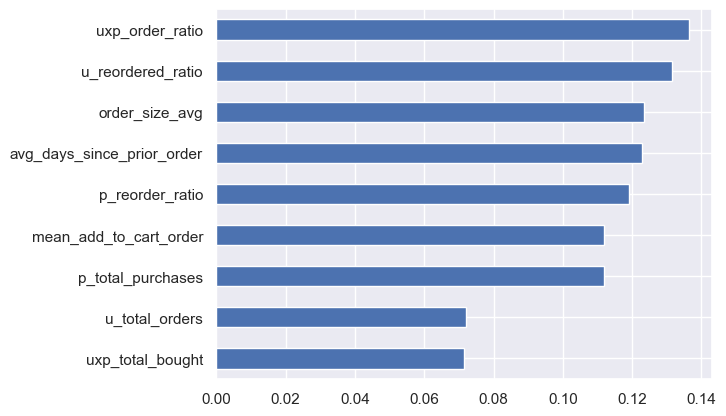

In [93]:
# Most import features
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values()
feat_importances.plot(kind='barh')

gc.collect()

In [94]:
prediction = model.predict(data_test)

In [95]:
data_test['prediction'] = prediction
data_test.head(50)

uxp_total_bought  uxp_order_ratio  \
user_id product_id                                      
32      578                        1         0.333333   
        2452                       2         0.400000   
        4605                       1         0.200000   
        4793                       3         1.000000   
        4799                       1         0.250000   
        4962                       1         0.500000   
        5134                       1         0.250000   
        5612                       1         0.250000   
        6069                       2         0.500000   
        6187                       1         1.000000   
        7781                       2         0.400000   
        7963                       1         0.250000   
        8239                       1         0.500000   
        9203                       2         0.500000   
        9637                       4         1.000000   
        9934                       1         0.250000   
        10831                      1         1.000000   
        11130                      3         0.750000   
        12341                      1         0.250000   
        12745                      1         0.250000   
        13049                      1         1.000000   
        13629                      3         0.750000   
        14332                      1         1.000000   
        14678                      1         0.250000   
        15592                      1         0.250000   
        17149                      1         0.250000   
        17224                      1         0.250000   
        17630                      2         1.000000   
        17758                      1         0.333333   
        18370                      1         0.500000   
        18523                      1         0.333333   
        20168                      2         0.666667   
        21137                      2         1.000000   
        21777                      1         0.250000   
        21927                      3         0.750000   
        22849                      1         0.250000   
        22963                      1         0.500000   
        23765                      1         0.200000   
        24489                      1         1.000000   
        24852                      4         0.800000   
        25005                      1         0.250000   
        26209                      1         0.250000   
        27531                      1         0.250000   
        27966                      1         1.000000   
        28696                      1         0.333333   
        31683                      1         0.250000   
        32433                      1         0.200000   
        32864                      1         0.250000   
        33754                      1         0.500000   
        34126                      1         0.250000   

                    avg_days_since_prior_order  u_reordered_ratio  \
user_id product_id                                                  
32      578                               22.2           0.298246   
        2452                              22.2           0.298246   
        4605                              22.2           0.298246   
        4793                              22.2           0.298246   
        4799                              22.2           0.298246   
        4962                              22.2           0.298246   
        5134                              22.2           0.298246   
        5612                              22.2           0.298246   
        6069                              22.2           0.298246   
        6187                              22.2           0.298246   
        7781                              22.2           0.298246   
        7963                              22.2           0.298246   
        8239                              22.2           0.298246   
        9203        

In [96]:
#Reset the index
final = data_test.reset_index()
#Keep only the required columns
final = final[['product_id', 'user_id', 'prediction']]

gc.collect()
final.head(20)

,product_id,user_id,prediction
0,578,32,0.0
1,2452,32,0.0
2,4605,32,0.0
3,4793,32,0.0
4,4799,32,0.0
5,4962,32,0.0
6,5134,32,0.0
7,5612,32,0.0
8,6069,32,0.0
9,6187,32,0.0


In [ ]:
#Model 2: DEcision Tree model

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #validate algorithm
from sklearn.metrics import f1_score, classification_report, confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(data_train.drop('reordered', axis=1), data_train.reordered, test_size=0.8, random_state=42)

dtc = DecisionTreeClassifier(random_state=13)
model = dtc.fit(X_train, y_train)


y_val_pred = (dtc.predict_proba(X_val)[:,1] >= 0.50).astype(int)

### Get scores on validation set

print(f1_score(y_val, y_val_pred, average='binary'))
print(classification_report(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred))

0.2589839842531543
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92   1229563
         1.0       0.25      0.27      0.26    132589

    accuracy                           0.85   1362152
   macro avg       0.58      0.59      0.59   1362152
weighted avg       0.86      0.85      0.85   1362152

[[1119356  110207]
 [  96472   36117]]


In [ ]:
#Model 3: Neural Network

In [153]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [155]:
sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_val)

In [156]:
input_dim =  X_train_sc.shape[1]
input_dim

9

In [162]:
history = History()

classifier = Sequential()

classifier.add(Dense(units = 64, activation = 'relu', input_dim = input_dim))
classifier.add(Dense(units = 15, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'relu'))
classifier.add(Dense(units = 1, activation ='sigmoid'))

classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                640       
                                                                 
 dense_17 (Dense)            (None, 15)                975       
                                                                 
 dense_18 (Dense)            (None, 4)                 64        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,684
Trainable params: 1,684
Non-trainable params: 0
_________________________________________________________________


In [170]:
# fit the model
classifier.fit(X_train_sc, y_train, epochs=25, batch_size=512, validation_split=0.15, verbose=1,class_weight= {0:1, 1:10},
          callbacks = [history, keras.callbacks.EarlyStopping(monitor='val_loss',
                                                              min_delta=0, patience=10, verbose=0, mode='auto')])

Epoch 1/25
566/566 [==============================] - 2s 3ms/step - loss: 0.9780 - accuracy: 0.7236 - val_loss: 0.5449 - val_accuracy: 0.7203
Epoch 2/25
566/566 [==============================] - 2s 3ms/step - loss: 0.9775 - accuracy: 0.7244 - val_loss: 0.5086 - val_accuracy: 0.7525
Epoch 3/25
566/566 [==============================] - 2s 3ms/step - loss: 0.9781 - accuracy: 0.7239 - val_loss: 0.4794 - val_accuracy: 0.7716
Epoch 4/25
566/566 [==============================] - 2s 3ms/step - loss: 0.9765 - accuracy: 0.7244 - val_loss: 0.5178 - val_accuracy: 0.7377
Epoch 5/25
566/566 [==============================] - 2s 3ms/step - loss: 0.9772 - accuracy: 0.7230 - val_loss: 0.5230 - val_accuracy: 0.7410
Epoch 6/25
566/566 [==============================] - 2s 3ms/step - loss: 0.9767 - accuracy: 0.7242 - val_loss: 0.5898 - val_accuracy: 0.6887
Epoch 7/25
566/566 [==============================] - 2s 3ms/step - loss: 0.9771 - accuracy: 0.7224 - val_loss: 0.5574 - val_accuracy: 0.7118
Epoch 

In [171]:
eval_model=classifier.evaluate(X_train_sc, y_train)
print('loss: ', eval_model[0], 'and Accuracy: ', eval_model[1])

10642/10642 [==============================] - 19s 2ms/step - loss: 0.4993 - accuracy: 0.7510
loss:  0.49926048517227173 and Accuracy:  0.7510439157485962


Text(0.5, 1.0, 'Loss')

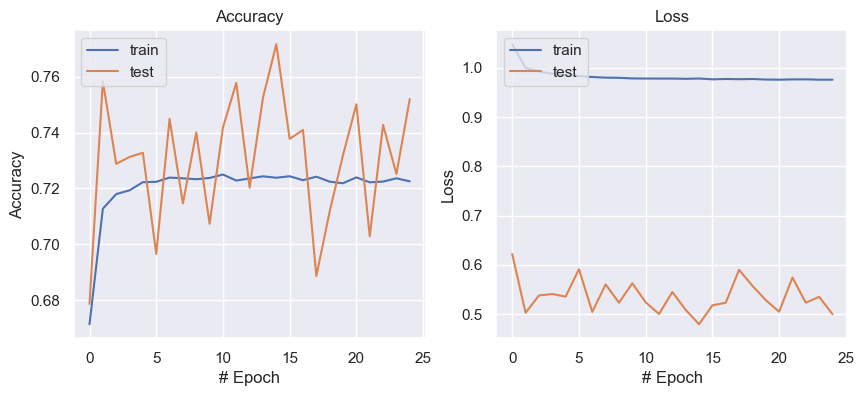

In [172]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

# Accuracy
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('# Epoch')
ax[0].legend(['train', 'test'], loc='upper left')
ax[0].set_title('Accuracy')

# Loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('# Epoch')
ax[1].legend(['train', 'test'], loc='upper left')
predict_prob=model.predict([testa,testb])

predict_classes=np.argmax(predict_prob,axis=1)ax[1].set_title('Loss')

In [186]:
probabilities = np.argmax(y_train)
predictions = model.predict(X_train_sc)

print ("\n Classification report : \n",classification_report(y_train, predictions))


C:\Users\Don\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(



 Classification report : 
               precision    recall  f1-score   support

         0.0       0.92      0.73      0.81    307481
         1.0       0.14      0.39      0.20     33057

    accuracy                           0.70    340538
   macro avg       0.53      0.56      0.51    340538
weighted avg       0.84      0.70      0.75    340538

